# Supply Chain Management

# Problem Statement

An FMCG company entered into the instant noodles business two years back. 
Their higher management has noticed that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. 
In both ways, it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in every warehouse in the entire country

# The solution for the problem

This problem can be addressed using regression modeling. 
In simpler terms, the company faces a situation where the demand for their instant noodles doesn't align well with the available supply. Sometimes, they have too much stock leading to higher inventory costs, and other times they run out of stock, missing out on potential sales. 
The higher management wants to use a regression model to optimize how much stock each warehouse should have to better match the demand and avoid excessive inventory costs or stock shortages.
This model will help predict the right amount of noodles to keep in each warehouse based on past demand patterns and other relevant factors.

# Load and Read the Data loading

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
supply_chain=pd.read_csv("supply chain dataset.csv")

In [3]:
supply_chain.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


# Visual inspection of data: Check the number of rows and columns

In [4]:
supply_chain.shape

(25000, 24)

In [64]:
df=df1.concatenate(df2)

NameError: name 'df1' is not defined

Columns names

In [5]:
supply_chain.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

# EDA

EDA-Exploratory data analysis is all about analyzing the dataset and summarizing the key insights and characteristics of the data

In [6]:
#Understanding the attributes
#checking the datatype of the columns where info() method describe the information
supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

There are 2 float datatype columns,14 integer datatype columns,8 object(string)datatype

# Getting the unique values of categorical variables

In [7]:
supply_chain['Location_type'].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

In [8]:
supply_chain['WH_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

In [9]:
supply_chain['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [10]:
supply_chain['WH_regional_zone'].value_counts()

Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64

In [11]:
supply_chain['wh_owner_type'].value_counts()

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

In [12]:
supply_chain['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [13]:
supply_chain['transport_issue_l1y'].value_counts()

0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: transport_issue_l1y, dtype: int64

In [14]:
supply_chain['wh_breakdown_l3m'].value_counts()

2    5076
3    5006
4    4037
6    4012
5    3925
1    2036
0     908
Name: wh_breakdown_l3m, dtype: int64

In [15]:
supply_chain['electric_supply'].value_counts()

1    16422
0     8578
Name: electric_supply, dtype: int64

# Removal of unwanted variables

before we move on to the univariate and bivariate analysis, basic steps should be performed to avoid complexities. Hence, we are removing the unwanted variables that are not useful for the analysis and model building.

In [16]:

supply_chain=supply_chain.drop(['Ware_house_ID','WH_Manager_ID','wh_est_year'], axis=1)

Checking duplicates

In [17]:
dups = supply_chain.duplicated()
print('Number of duplicahttp = %d' % (dups.sum()))

Number of duplicahttp = 0


# Univariate Analysis

In [18]:
#Univariate Analysis used to find the distribution of the data of single feature

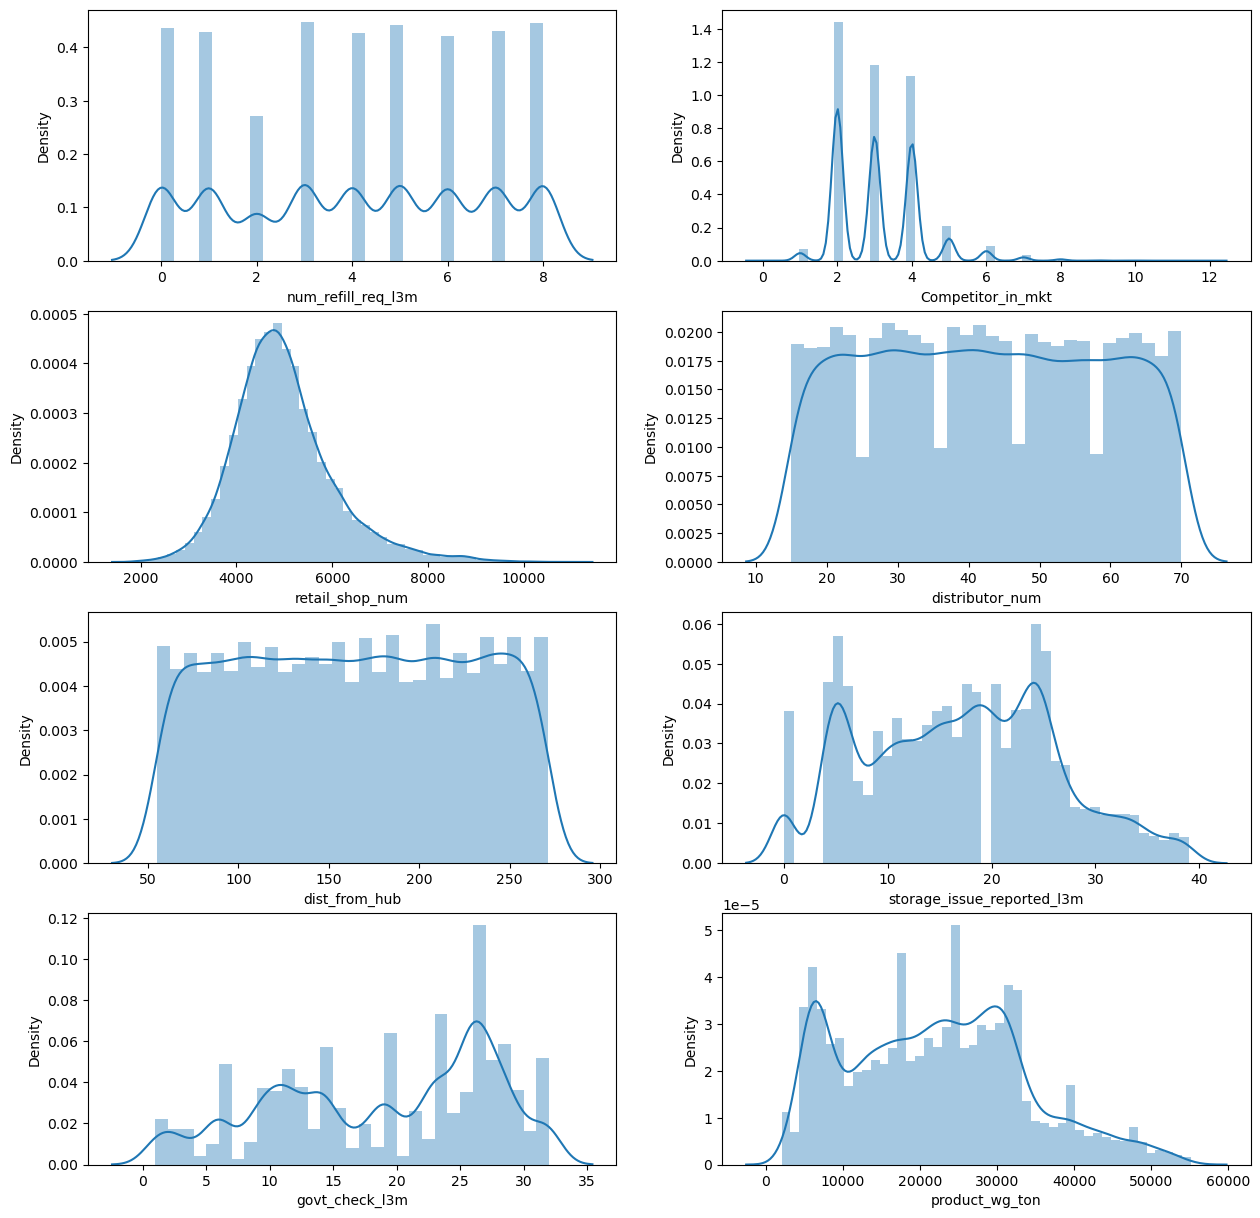

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.distplot(supply_chain['num_refill_req_l3m'],kde=True, ax=axes[0][0])
sns.distplot(supply_chain['Competitor_in_mkt'] , kde=True, ax=axes[0][1])
sns.distplot(supply_chain['retail_shop_num'] , kde=True, ax=axes[1][0])
sns.distplot(supply_chain['distributor_num'] , kde=True, ax=axes[1][1])
sns.distplot(supply_chain['dist_from_hub'] , kde=True, ax=axes[2][0])
sns.distplot(supply_chain['storage_issue_reported_l3m'] , kde=True, ax=axes[2][1])
sns.distplot(supply_chain['govt_check_l3m'] , kde=True, ax=axes[3][0])
sns.distplot(supply_chain['product_wg_ton'] , kde=True, ax=axes[3][1])
plt.show()

<AxesSubplot:xlabel='workers_num', ylabel='Density'>

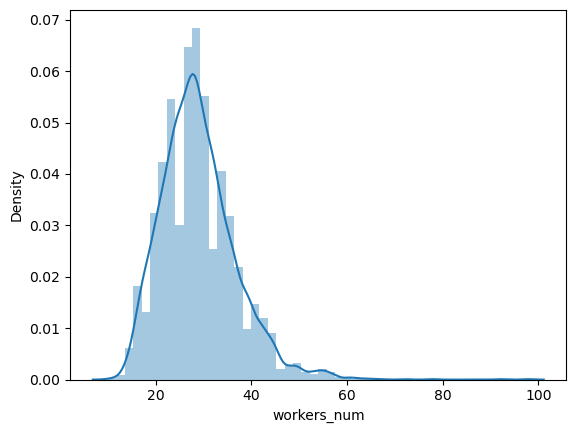

In [20]:
sns.distplot(supply_chain['workers_num'] , kde=True)

# FINDINGS:

In [21]:
# For categorical data

<AxesSubplot:xlabel='temp_reg_mach', ylabel='count'>

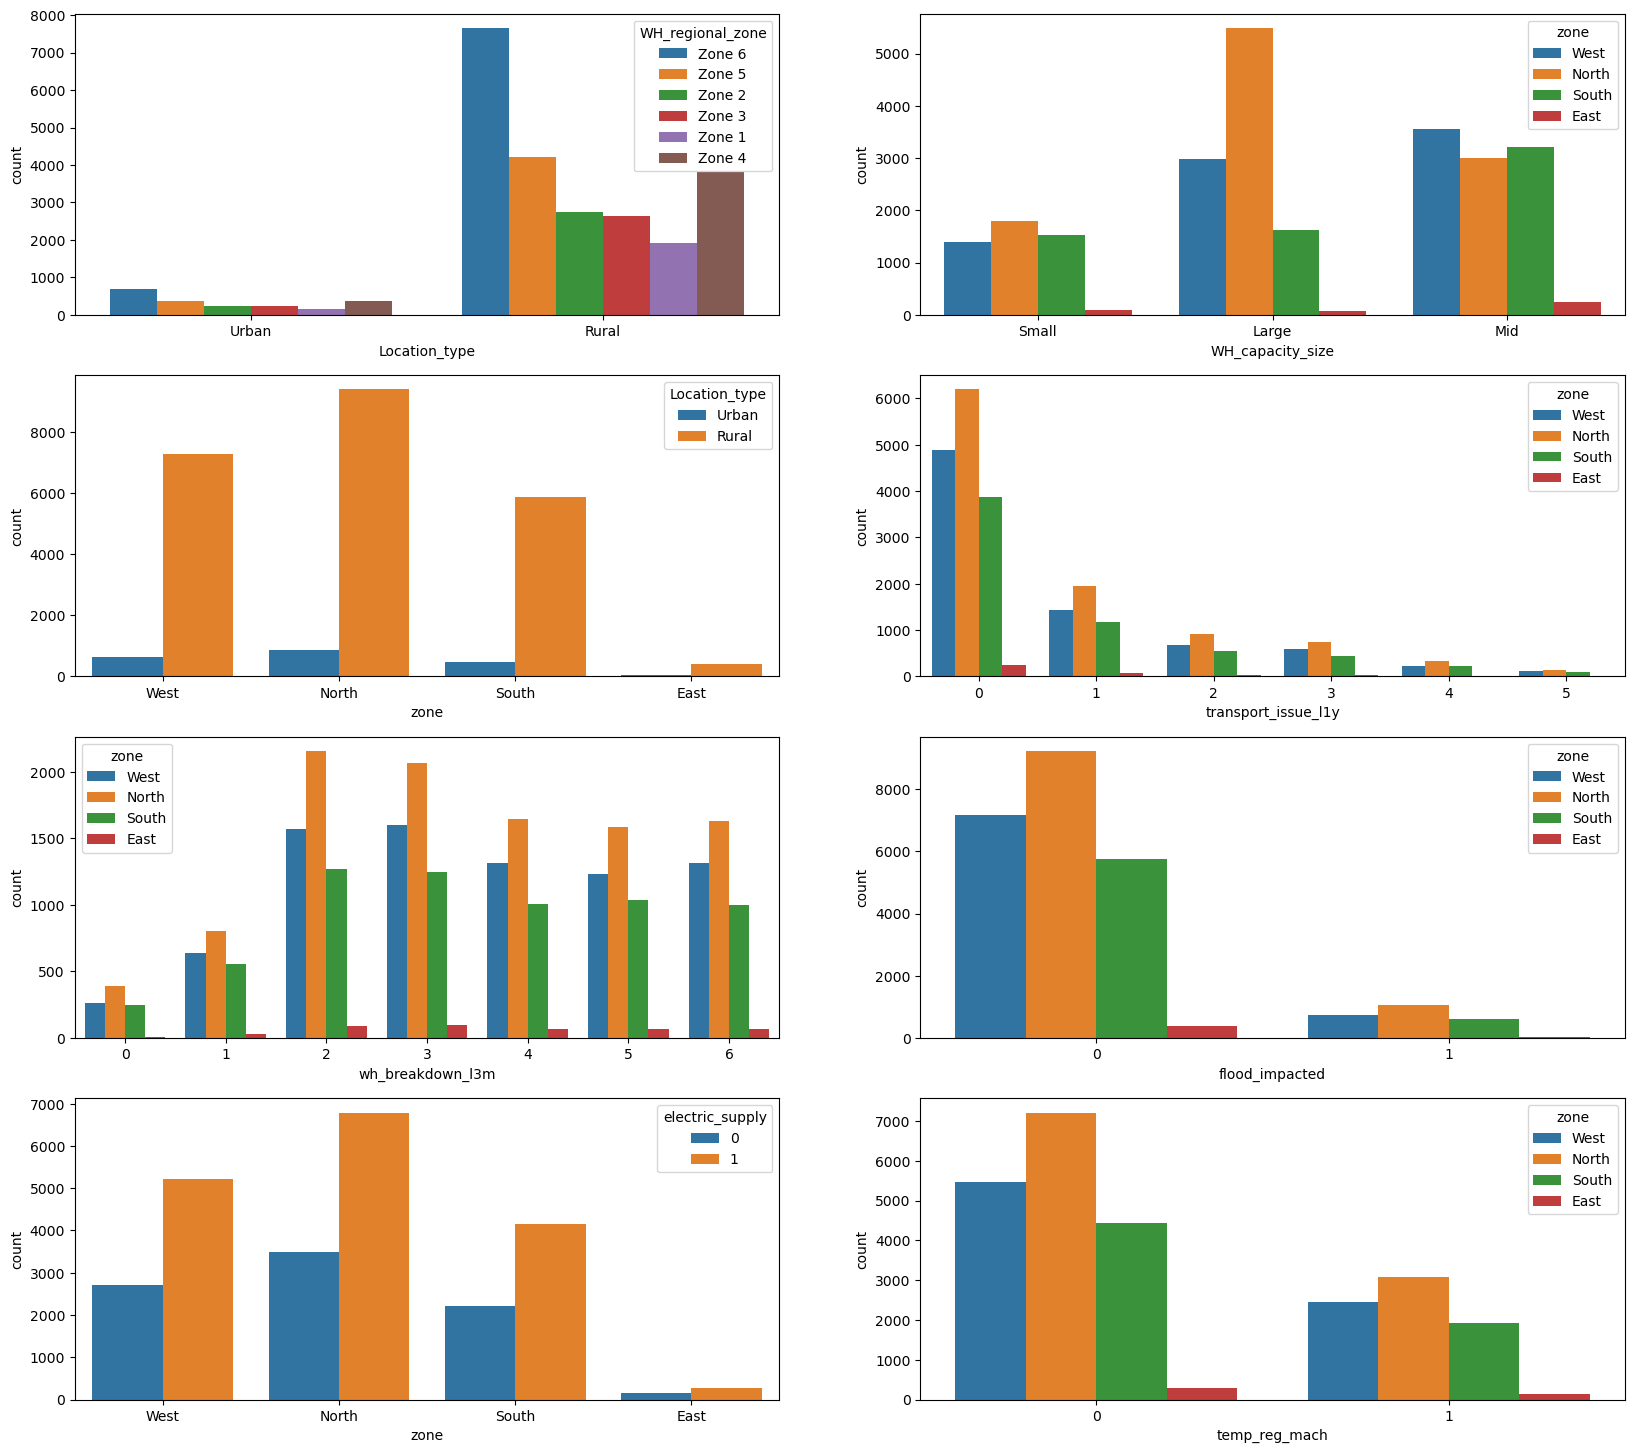

In [22]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.countplot(x='Location_type',hue='WH_regional_zone', data=supply_chain, ax=axes[0][0])
sns.countplot(x='WH_capacity_size',hue='zone', data=supply_chain, ax=axes[0][1])
sns.countplot(x='zone',hue="Location_type", data=supply_chain, ax=axes[1][0])
sns.countplot(x='transport_issue_l1y',hue='zone', data=supply_chain, ax=axes[1][1])
sns.countplot(x='wh_breakdown_l3m',hue='zone', data=supply_chain, ax=axes[2][0])
sns.countplot(x='flood_impacted',hue='zone', data=supply_chain, ax=axes[2][1])
sns.countplot(x='zone',hue='electric_supply', data=supply_chain, ax=axes[3][0])
sns.countplot(x='temp_reg_mach',hue='zone', data=supply_chain, ax=axes[3][1])


# Heatmap

In [23]:
#bivariate analysis
#Understanding the correlation between various features in the data set

In [24]:
correlation=supply_chain.corr()

<AxesSubplot:>

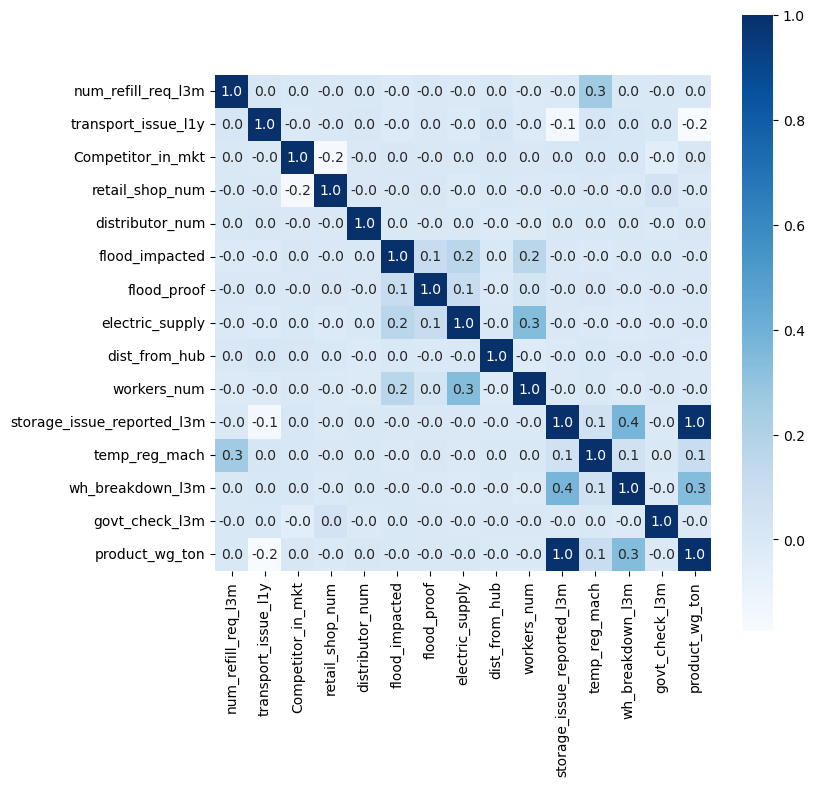

In [25]:
#constracting the heatmap to understand the correlation

plt.figure(figsize=(8,8)) 
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

# Missing values Treatment

In [26]:
#Examine missing values
supply_chain_na = supply_chain.isna().sum()
supply_chain_na[supply_chain_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

workers_num                     990
approved_wh_govt_certificate    908
dtype: int64

In [27]:
# workers_number and approved_wh_govt_certificate  columns have missing values

In [28]:
fig,ax = plt.subplots(figsize=(4,4))
sns.distplo tt(supply_chain.workers_num)

SyntaxError: invalid syntax (3499902312.py, line 2)

workers_num is right skewed distribution so median is used to handle the data

In [29]:
supply_chain['workers_num'].fillna(supply_chain['workers_num'].median(), inplace = True)

In [30]:
#since the columns is categorical so replace with mode

supply_chain['approved_wh_govt_certificate'].fillna(supply_chain['approved_wh_govt_certificate'].mode()[0], inplace = True)

In [31]:
supply_chain.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

There is no missing values in the dataset

# Outlier Treatment

In [32]:
supply_chain1 = pd.DataFrame(supply_chain, columns = ['num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','dist_from_hub','workers_num','storage_issue_reported_l3m','wh_breakdown_l3m','govt_check_l3m','product_wg_ton'])

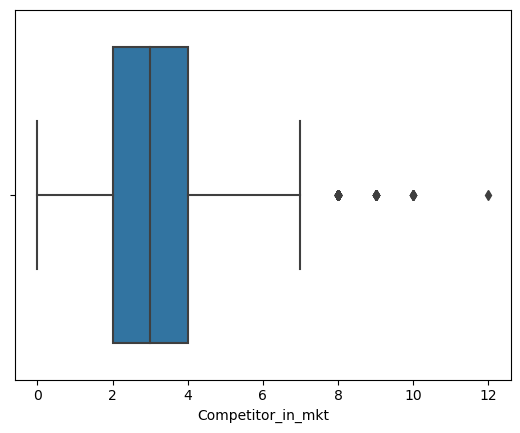

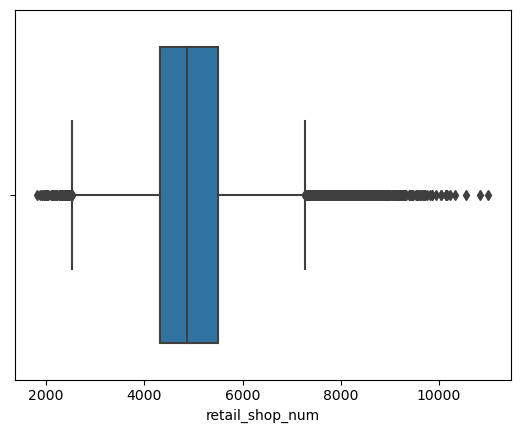

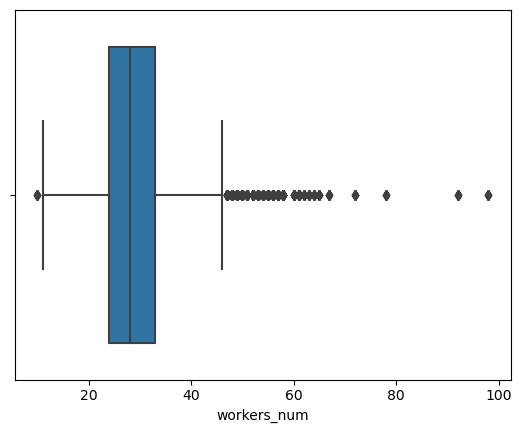

In [33]:
cols = ['Competitor_in_mkt','retail_shop_num','workers_num']

for i in cols:
    sns.boxplot(supply_chain1[i])
    plt.show()

In [34]:
#removal_of_outlier

In [35]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [36]:
cont=supply_chain1.dtypes[(supply_chain1.dtypes!='uint8') & (supply_chain1.dtypes!='category')].index

In [37]:
for column in supply_chain1[cont].columns:
    lr,ur=remove_outlier(supply_chain1[column])
    supply_chain1[column]=np.where(supply_chain1[column]>ur,ur,supply_chain1[column])
    supply_chain1[column]=np.where(supply_chain1[column]<lr,lr,supply_chain1[column])

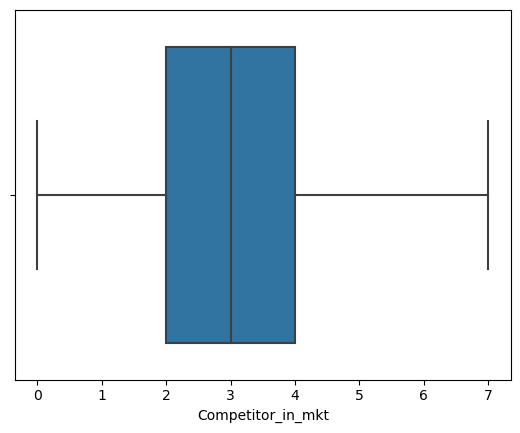

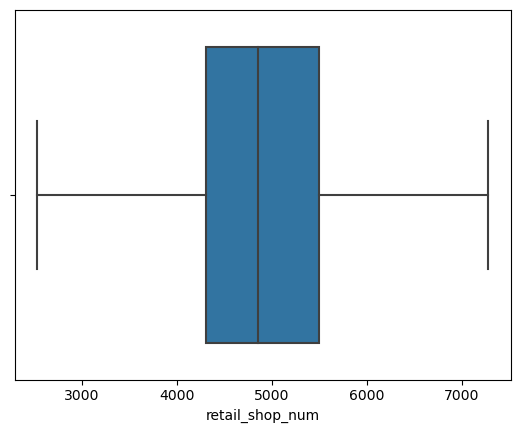

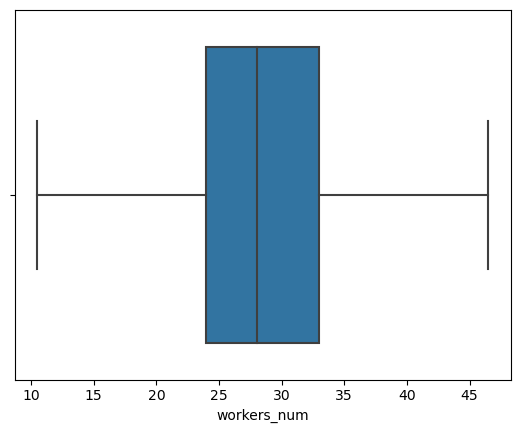

In [38]:
cols = ['Competitor_in_mkt','retail_shop_num','workers_num']

for i in cols:
    sns.boxplot(supply_chain1[i])
    plt.show()

# Encoding

In [39]:
supply_chain.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071


In [40]:
supply_chain_en = pd.get_dummies(supply_chain, columns=['Location_type', 'WH_capacity_size', 'zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate'], drop_first=True)

In [41]:
supply_chain_en.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,...,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,...,0,1,0,0,0,1,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,...,0,0,0,1,0,0,0,0,0,1


In [42]:
supply_chain_en.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Location_type_Urban',
       'WH_capacity_size_Mid', 'WH_capacity_size_Small', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Rented', 'approved_wh_govt_certificate_A+',
       'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+',
       'approved_wh_govt_certificate_C'],
      dtype='object')

In [43]:
supply_chain_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_refill_req_l3m               25000 non-null  int64  
 1   transport_issue_l1y              25000 non-null  int64  
 2   Competitor_in_mkt                25000 non-null  int64  
 3   retail_shop_num                  25000 non-null  int64  
 4   distributor_num                  25000 non-null  int64  
 5   flood_impacted                   25000 non-null  int64  
 6   flood_proof                      25000 non-null  int64  
 7   electric_supply                  25000 non-null  int64  
 8   dist_from_hub                    25000 non-null  int64  
 9   workers_num                      25000 non-null  float64
 10  storage_issue_reported_l3m       25000 non-null  int64  
 11  temp_reg_mach                    25000 non-null  int64  
 12  wh_breakdown_l3m  

# Train-test split

In [44]:
# Copy all the independent variables into X dataframe
X = supply_chain_en.drop('product_wg_ton', axis=1)

# Copy target into the y dataframe. 
y =supply_chain_en[['product_wg_ton']]

In [45]:
X.head()


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,...,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,...,0,1,0,0,0,1,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,...,0,0,0,1,0,0,0,0,0,1


In [46]:
y.head()

,product_wg_ton
0,17115
1,5074
2,23137
3,22115
4,24071


In [47]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=2)

In [48]:
X_train.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
18687,5,1,2,4925,28,0,0,1,188,32.0,...,0,0,0,0,1,0,0,1,0,0
127,8,0,8,3948,54,1,0,1,161,25.0,...,0,0,0,0,0,1,0,1,0,0
24837,7,1,3,4759,62,0,0,1,180,30.0,...,0,0,0,1,0,0,0,0,1,0
7286,1,1,3,6846,41,0,0,0,132,30.0,...,0,0,0,0,1,1,0,0,0,1
22021,6,2,2,6178,58,0,0,1,263,30.0,...,0,1,0,0,0,0,0,1,0,0


# Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 

x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [50]:
x_train_scaled

array([[ 0.34607259,  0.18838712, -0.96956389, ...,  2.04188501,
        -0.49695124, -0.58327789],
       [ 1.49907138, -0.6462922 ,  4.28505029, ...,  2.04188501,
        -0.49695124, -0.58327789],
       [ 1.11473845,  0.18838712, -0.09379486, ..., -0.48974354,
         2.01226986, -0.58327789],
       ...,
       [ 0.73040552, -0.6462922 , -0.09379486, ..., -0.48974354,
        -0.49695124,  1.71444867],
       [ 0.34607259,  1.02306644, -0.96956389, ...,  2.04188501,
        -0.49695124, -0.58327789],
       [ 0.73040552,  1.02306644, -0.09379486, ..., -0.48974354,
        -0.49695124, -0.58327789]])

# Model building and Model Evaluation (MSE, MAE, R^2) 

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

# Decision Tree Regressor

In [52]:
decision_tree_regressor=DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree_regressor.fit(x_train_scaled, y_train)
y_pred_decision_tree=decision_tree_regressor.predict(x_test_scaled)

mae_decision_tree=mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree=mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree=r2_score(y_test, y_pred_decision_tree)

In [53]:
print("Decision tree regression metrics:")
print("Mean Absolute Error:",mae_decision_tree)
print("Mean Squared Error:",mse_decision_tree)
print("R^2 score:",r2_decision_tree)

Decision tree regression metrics:
Mean Absolute Error: 1155.4004906243465
Mean Squared Error: 2400804.3703095834
R^2 score: 0.9821929127915512


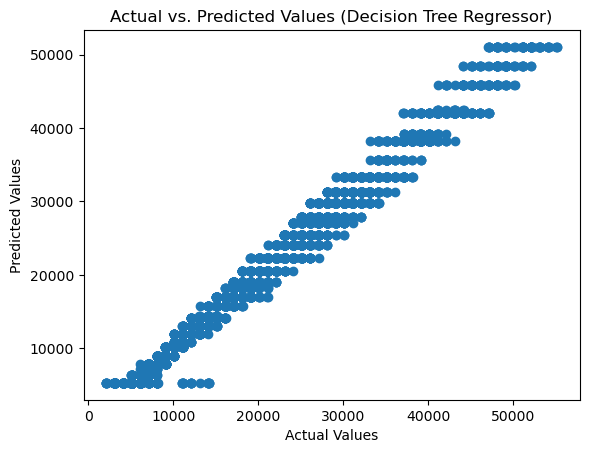

In [54]:
# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred_decision_tree)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree Regressor)")
plt.show()

# Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
random_forest_regressor=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
random_forest_regressor.fit(x_train_scaled, y_train)
y_pred_random_forest=random_forest_regressor.predict(x_test_scaled)
mae_random_forest=mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest=mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest=r2_score(y_test, y_pred_random_forest)

In [57]:
print("Random forest regression metrics:")
print("Mean Absolute Error:",mae_random_forest)
print("Mean Squared Error:",mse_random_forest)
print("R^2 score:",r2_random_forest)

Random forest regression metrics:
Mean Absolute Error: 1106.52043318478
Mean Squared Error: 2177928.2803984885
R^2 score: 0.9838460145681084


Text(0, 0.5, 'Predicted Values')

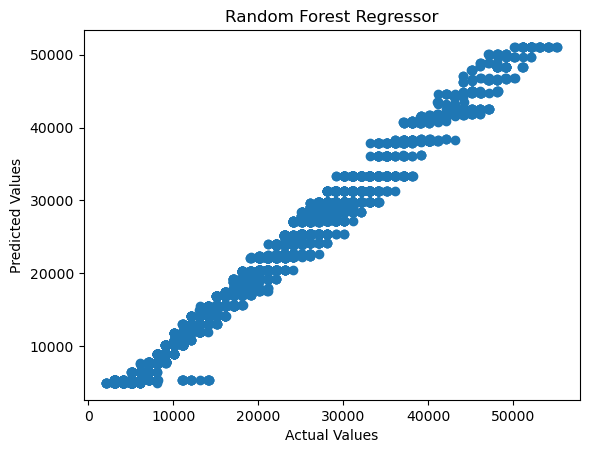

In [58]:
plt.scatter(y_test, y_pred_random_forest)
plt.title("Random Forest Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train_scaled, y_train)
y_pred = linear_regression_model.predict(x_test_scaled)
Lmae = mean_absolute_error(y_test, y_pred)
Lmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (LMAE):", Lmae)
print("Mean Squared Error (LMSE):", Lmse)
print("R-squared (R2):", r2)

Mean Absolute Error (LMAE): 1016.8633334586256
Mean Squared Error (LMSE): 2051213.5859642029
R-squared (R2): 0.9847858744093716


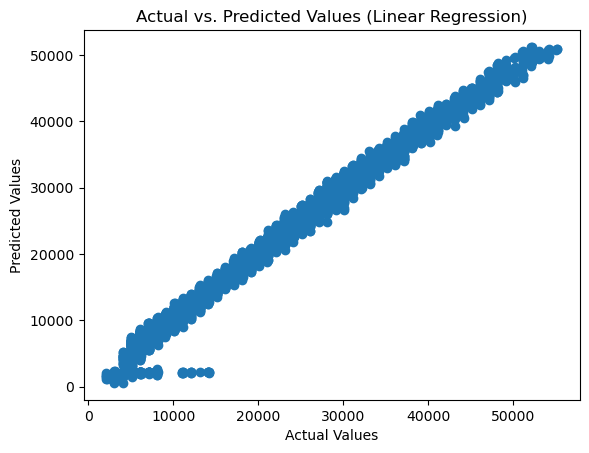

In [61]:
# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()

# MODEL PREDICTION

In [62]:
accuracy_data = [['Linear Regression',Lmae,Lmse,r2 ],
        ['Decision Tree',mae_decision_tree,mse_decision_tree,r2_decision_tree],
        ['Random Forest', mae_random_forest,mse_random_forest,r2_random_forest]]
accuracy_df = pd.DataFrame(accuracy_data, columns=['Model', 'MSE', 'MAE', 'R2 SCORE'])
accuracy_df['MSE'] =accuracy_df['MSE'].apply(np.int64)
accuracy_df

,Model,MSE,MAE,R2 SCORE
0,Linear Regression,1016,2.051214e+06,0.984786
1,Decision Tree,1155,2.400804e+06,0.982193
2,Random Forest,1106,2.177928e+06,0.983846


# CONCLUSION

Model Performance Evaluation:
The Linear Regression outperformed other models, achieving the  highest R-squared (R2) score on the test dataset.Linear Regression, Random Forest Regressor, decision treer also showed good performance.

